In [22]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

In [23]:
# Define image and training parameters
img_height, img_width = 128, 128
batch_size = 32
epochs = 15

Found 8710 images belonging to 4 classes.
Found 1867 images belonging to 4 classes.
Found 1869 images belonging to 4 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
273/273 ━━━━━━━━━━━━━━━━━━━━ 188s 677ms/step - accuracy: 0.5714 - loss: 1.0699 - val_accuracy: 0.7220 - val_loss: 0.7104
Epoch 2/15
273/273 ━━━━━━━━━━━━━━━━━━━━ 169s 619ms/step - accuracy: 0.7250 - loss: 0.7155 - val_accuracy: 0.8286 - val_loss: 0.4130
Epoch 3/15
273/273 ━━━━━━━━━━━━━━━━━━━━ 168s 614ms/step - accuracy: 0.7887 - loss: 0.5521 - val_accuracy: 0.8618 - val_loss: 0.3376
Epoch 4/15
273/273 ━━━━━━━━━━━━━━━━━━━━ 204s 623ms/step - accuracy: 0.8261 - loss: 0.4450 - val_accuracy: 0.8265 - val_loss: 0.4567
Epoch 5/15
273/273 ━━━━━━━━━━━━━━━━━━━━ 207s 640ms/step - accuracy: 0.8526 - loss: 0.3742 - val_accuracy: 0.8752 - val_loss: 0.3279
Epoch 6/15
273/273 ━━━━━━━━━━━━━━━━━━━━ 174s 636ms/step - accuracy: 0.8878 - loss: 0.2973 - val_accuracy: 0.8361 - val_loss: 0.4512
Epoch 7/15
273/273 ━━━━━━━━━━━━━━━━━━━━ 212s 672ms/step - accuracy: 0.9015 - loss: 0.2743 - val_accuracy: 0.9020 - val_loss: 0.2735
Epoch 8/15
273/273 ━━━━━━━━━━━━━━━━━━━━ 174s 635ms/step - accuracy: 0.9112 -

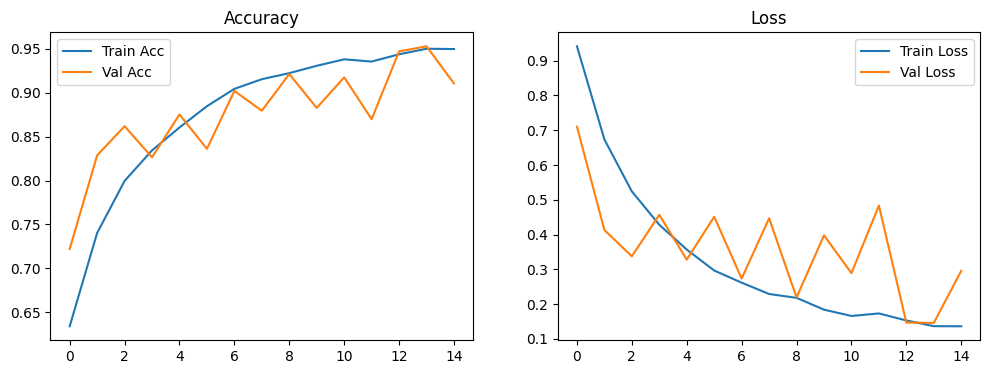

59/59 ━━━━━━━━━━━━━━━━━━━━ 11s 190ms/step


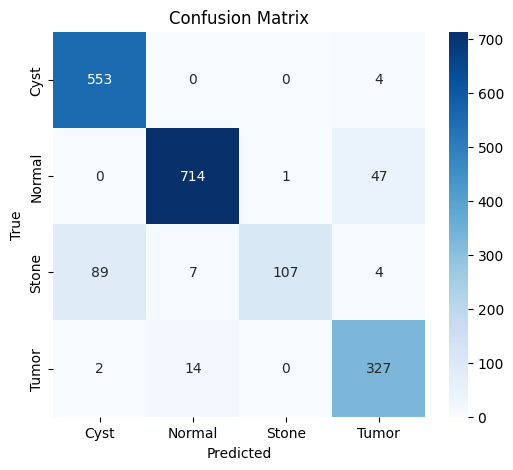


Classification Report:

              precision    recall  f1-score   support

        Cyst       0.86      0.99      0.92       557
      Normal       0.97      0.94      0.95       762
       Stone       0.99      0.52      0.68       207
       Tumor       0.86      0.95      0.90       343

    accuracy                           0.91      1869
   macro avg       0.92      0.85      0.86      1869
weighted avg       0.92      0.91      0.90      1869



In [24]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report

# Image and training settings
img_height, img_width = 128, 128
batch_size = 32
epochs = 15
dataset_path = '/kaggle/working/kidney_data'

# Directories
train_dir = os.path.join(dataset_path, 'train')
val_dir = os.path.join(dataset_path, 'val')
test_dir = os.path.join(dataset_path, 'test')

# Image generators
train_gen = ImageDataGenerator(rescale=1./255,
                               rotation_range=20,
                               zoom_range=0.2,
                               width_shift_range=0.1,
                               height_shift_range=0.1,
                               horizontal_flip=True)

val_gen = ImageDataGenerator(rescale=1./255)
test_gen = ImageDataGenerator(rescale=1./255)

# Data loaders
train_data = train_gen.flow_from_directory(train_dir, target_size=(img_height, img_width),
                                           batch_size=batch_size, class_mode='categorical')

val_data = val_gen.flow_from_directory(val_dir, target_size=(img_height, img_width),
                                       batch_size=batch_size, class_mode='categorical')

test_data = test_gen.flow_from_directory(test_dir, target_size=(img_height, img_width),
                                         batch_size=batch_size, class_mode='categorical',
                                         shuffle=False)

# CNN architecture
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(4, activation='softmax')  # 4 classes
])

# Compile
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Train
history = model.fit(train_data, validation_data=val_data, epochs=epochs)

# Evaluate
test_loss, test_acc = model.evaluate(test_data)
print(f"\n✅ Test Accuracy: {test_acc * 100:.2f}%")

# Accuracy & Loss Curves
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title("Accuracy")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("Loss")
plt.legend()
plt.show()

# Confusion Matrix
predictions = model.predict(test_data)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_data.classes
class_labels = list(test_data.class_indices.keys())

cm = confusion_matrix(true_classes, predicted_classes)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

# Classification Report
print("\nClassification Report:\n")
print(classification_report(true_classes, predicted_classes, target_names=class_labels))


In [25]:
import os
import shutil
import random

# Set seed for reproducibility
random.seed(42)

# Original dataset path
original_dir = '/kaggle/input/kidney-cnn/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone'
base_dir = '/kaggle/working/kidney_data'

# Class names
classes = ['Cyst', 'Normal', 'Stone', 'Tumor']

# Create train/val/test folders
for split in ['train', 'val', 'test']:
    for cls in classes:
        os.makedirs(os.path.join(base_dir, split, cls), exist_ok=True)

# Define split ratios
train_ratio = 0.7
val_ratio = 0.15
test_ratio = 0.15

# Split images
for cls in classes:
    cls_path = os.path.join(original_dir, cls)
    images = os.listdir(cls_path)
    random.shuffle(images)

    train_end = int(train_ratio * len(images))
    val_end = int((train_ratio + val_ratio) * len(images))

    for i, img in enumerate(images):
        src = os.path.join(cls_path, img)
        if i < train_end:
            dst = os.path.join(base_dir, 'train', cls, img)
        elif i < val_end:
            dst = os.path.join(base_dir, 'val', cls, img)
        else:
            dst = os.path.join(base_dir, 'test', cls, img)
        shutil.copy2(src, dst)

print("✅ Dataset split completed.")


✅ Dataset split completed.


In [26]:
from tensorflow.keras.preprocessing import image
import numpy as np

# Load image
img_path = '/kaggle/input/kidney-cnn/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Cyst/Cyst- (1000).jpg'  # change path as needed
img = image.load_img(img_path, target_size=(img_height, img_width))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
img_array /= 255.0  # Rescale

# Predict
pred = model.predict(img_array)
predicted_class = np.argmax(pred, axis=1)[0]
class_labels = list(train_data.class_indices.keys())

print("Predicted Class:", class_labels[predicted_class])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step
Predicted Class: Cyst


In [27]:
from tensorflow.keras.preprocessing import image
import numpy as np

# Load image
img_path = '/kaggle/input/kidney-cnn/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Stone/Stone- (1018).jpg'  # change path as needed
img = image.load_img(img_path, target_size=(img_height, img_width))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
img_array /= 255.0  # Rescale

# Predict
pred = model.predict(img_array)
predicted_class = np.argmax(pred, axis=1)[0]
class_labels = list(train_data.class_indices.keys())

print("Predicted Class:", class_labels[predicted_class])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
Predicted Class: Stone
